In [201]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [202]:
# Loading the  Datasets

PushSale = pd.read_excel('c:\\Users\\Admin\\OneDrive\\Documents\\TS Group_EXCEL\\2024_2023_07\\PUSHSALE.xlsx')

In [203]:
PushSale.head(5)

,No.,#,Order_code,Data_date,Data_source,MKT_Name,MKT_TK,Customer_full_name,Customer_phone_number,Customer_classification,...,Order_deposit,Order_customer_needs_to_pay,Delivery_bill_of_lading,Delivery_unit,Service_delivery,Delivery_Status,Reconciliation,Delivery_commune,Delivery_district,Delivery_province
0,1,103742516,0,31/03/2024 23:34,MKT Thái Hà- Hồng Nhung,CGV - MKT Hồng Nhung,medihope.mkt19,Hương Nguyễn,0965618790,Khách mới,...,0.0,0.0,0,0,0,0,0,0,0,0
1,2,103742316,0,31/03/2024 23:24,MKTLB.BinhKy,MKT Bính Kỳ,medihope.mkt22,Phạm Thị Hòa,0986747032,Khách mới,...,0.0,0.0,0,0,0,0,0,0,0,0
2,3,85653097,0,31/07/2023 23:58,MKT Thái Hà- Hồng Nhung,MKT Nguyễn Hồng Nhung,medihope.mkt19,Lua Nguyen,0342565438,Khách mới,...,0.0,0.0,0,0,0,0,0,0,0,0
3,4,85652764,0,31/07/2023 23:33,MKT Thái Hà- Hồng Nhung,MKT Nguyễn Hồng Nhung,medihope.mkt19,Luong Thom,0335223217,Khách mới,...,0.0,0.0,0,0,0,0,0,0,0,0
4,5,85652762,0,31/07/2023 23:33,MKT Thái Hà- Hồng Nhung,MKT Nguyễn Hồng Nhung,medihope.mkt19,Ngoc Bich,0968159848,Khách mới,...,0.0,0.0,0,0,0,0,0,0,0,0


In [204]:
print("Total records (rows) in the PushSale Dataset : {}".format(PushSale.shape[0]))
print("Total features (columns) in the PushSale Dataset : {}".format(PushSale.shape[1]))

Total records (rows) in the PushSale Dataset : 72405
Total features (columns) in the PushSale Dataset : 44


1. RFM Analysis
FM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.<br>

- Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
- Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
- Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [205]:
# Convert the column to datetime, coerce any errors (like invalid date formats)
PushSale['Sale_order_closing_date'] = pd.to_datetime(PushSale['Sale_order_closing_date'], errors='coerce')

# Drop any rows where the conversion to datetime failed (optional, based on your data handling strategy)
PushSale = PushSale.dropna(subset=['Sale_order_closing_date'])

# Now, get the maximum date
max_closing_date = PushSale['Sale_order_closing_date'].max()
print(max_closing_date)


2024-12-08 19:18:00


In [206]:
# Maximum Transaction Date or the latest transaction date.

max_closing_date = max(PushSale['Sale_order_closing_date']).date()
max_closing_date

datetime.date(2024, 12, 8)

In [207]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_closing_date), "%Y-%m-%d")

In [208]:
# Creating an RFM table with recency, frequency, and monetary values.
rfm_table = PushSale.groupby(['Customer_phone_number']).agg({
    'Sale_order_closing_date': lambda date: (comparison_date - date.max()).days,  # Recency
    'Order_product_code': lambda prod_id: len(prod_id),  # Frequency (count of product codes)
    'Order_total_amount': lambda p: sum(p)  # Monetary (sum of order amounts)
})

print(rfm_table)


                       Sale_order_closing_date  Order_product_code  \
Customer_phone_number                                                
00327540274                                306                   2   
0325158717                                  61                   1   
0325343491                                   3                   2   
0325927596                                 186                   1   
0326016017                                 278                   1   
...                                        ...                 ...   
0989766531                                 307                   1   
0989775966                                   0                   2   
0989786737                                   3                   2   
0989953626                                 154                   2   
0989965057                                  33                   2   

                       Order_total_amount  
Customer_phone_number                      
0

In [209]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed

rfm_table.columns

Index(['Sale_order_closing_date', 'Order_product_code', 'Order_total_amount'], dtype='object')

In [210]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'Sale_order_closing_date' : 'recency', 
                        'Order_product_code' : 'frequency',
                        'Order_total_amount' : 'monetary'} , inplace=True)

In [211]:
# Xác định số lượng nhóm và ngưỡng tùy chỉnh
bins = [0, 1, 5, 10, 15]  # Thay đổi các ngưỡng này tùy theo phân phối của dữ liệu
labels = ['1', '2', '3', '4']

# Phân chia cột frequency thành các phân đoạn dựa trên các ngưỡng tùy chỉnh
rfm_table['f_quartile'] = pd.cut(rfm_table['frequency'], bins=bins, labels=labels, include_lowest=True)


In [212]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [213]:
# RFM_table dataset

rfm_table

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile
Customer_phone_number,,,,,,
00327540274,306,2,17800000.0,2,2,4
0325158717,61,1,5240000.0,1,4,2
0325343491,3,2,10300000.0,2,4,4
0325927596,186,1,5875000.0,1,3,2
0326016017,278,1,5150000.0,1,2,1
...,...,...,...,...,...,...
0989766531,307,1,5240000.0,1,2,2
0989775966,0,2,20780000.0,2,4,4
0989786737,3,2,9040000.0,2,4,3


In [214]:
print(rfm_table.columns)


Index(['recency', 'frequency', 'monetary', 'f_quartile', 'r_quartile',
       'm_quartile'],
      dtype='object')


In [215]:
print(rfm_table['frequency'].describe())


count    1052.000000
mean        1.289924
std         0.503625
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: frequency, dtype: float64


In [216]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [217]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [218]:
# RFM table dataset

rfm_table

,recency,frequency,monetary,f_quartile,r_quartile,m_quartile,rfm_score,customer_title
Customer_phone_number,,,,,,,,
00327540274,306,2,17800000.0,2,2,4,224,Silver
0325158717,61,1,5240000.0,1,4,2,412,Platinum
0325343491,3,2,10300000.0,2,4,4,424,Platinum
0325927596,186,1,5875000.0,1,3,2,312,Gold
0326016017,278,1,5150000.0,1,2,1,211,Bronze
...,...,...,...,...,...,...,...,...
0989766531,307,1,5240000.0,1,2,2,212,Silver
0989775966,0,2,20780000.0,2,4,4,424,Platinum
0989786737,3,2,9040000.0,2,4,3,423,Platinum


2. Creating a Detail Customer title / tag based on RFM Score

An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.<br>
The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [219]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [220]:
# Applying the above functions and creating a new feature detail_cust_title

rfm_table['detail_cust_title']=rfm_table[['rfm_score']].apply(cust_score_title_lkup, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19428\1375572388.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [221]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [222]:
# Applying the above functions and creating a new feature rank

PushSale_rfm_table['rank']=PushSale_rfm_table[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19428\782112168.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


3. Exporting to CSV file

In [223]:
rfm_table.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [224]:
print("Total records in final dataset : {}".format(rfm_table.shape[0]))

Total records in final dataset : 1052


Merge RFM vs Pushsale

In [225]:
PushSale_rfm_table = pd.merge(PushSale, rfm_table, left_on='Customer_phone_number', right_on='Customer_phone_number', how='inner')

4. RFM Analysis


### 4.1. Recency vs Monetary

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

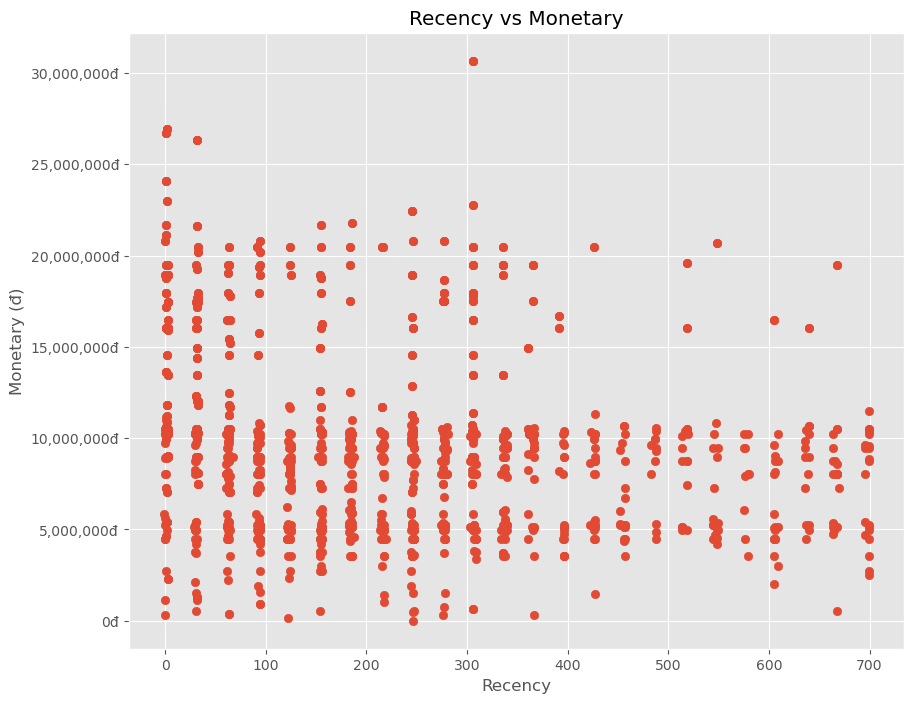

In [226]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Thêm dòng này để nhập module ticker

# Tạo biểu đồ phân tán
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.scatter(PushSale_rfm_table['recency'], PushSale_rfm_table['monetary'])

# Đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('Recency')
plt.ylabel('Monetary (đ)')
plt.title('Recency vs Monetary')

# Định dạng trục y để hiển thị số tiền với dấu phân cách hàng nghìn và ký hiệu đồng
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}đ'))

# Hiển thị biểu đồ
plt.show()


### 4.2 Frequency vs Monetary

Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business. 

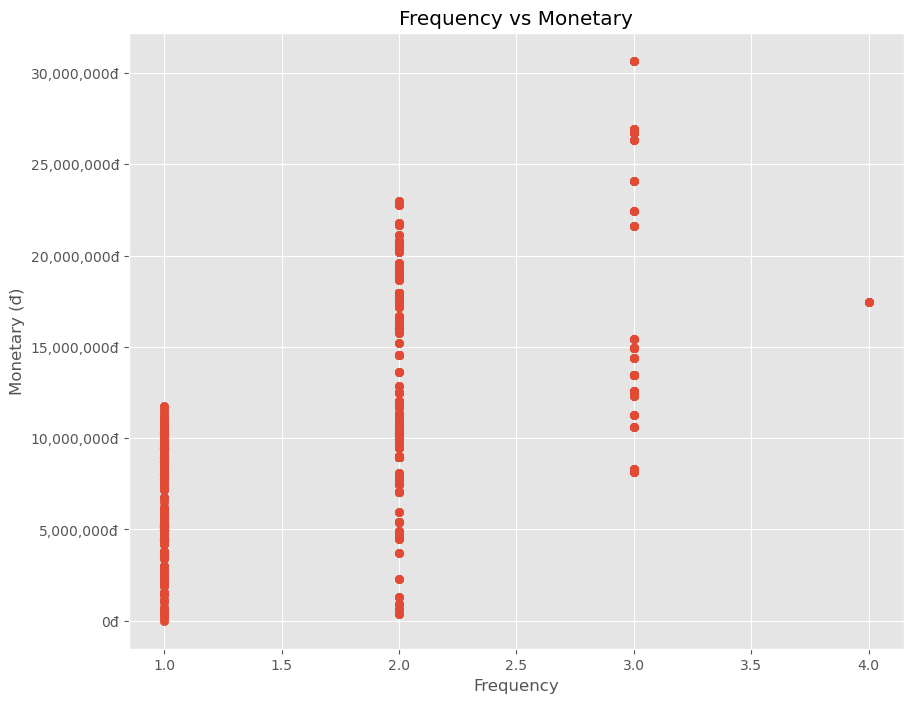

In [227]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Thêm dòng này để nhập module ticker

# Tạo biểu đồ phân tán
plt.figure(figsize=(10,8))
ax = plt.gca()
ax.scatter(PushSale_rfm_table['frequency'], PushSale_rfm_table['monetary'])

# Đặt nhãn và tiêu đề cho biểu đồ
plt.xlabel('Frequency')
plt.ylabel('Monetary (đ)')
plt.title('Frequency vs Monetary')

# Định dạng trục y để hiển thị số tiền với dấu phân cách hàng nghìn và ký hiệu đồng
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}đ'))

# Hiển thị biểu đồ
plt.show()


4.3. Data Analysis Exploration

New Customer

In [228]:
# Loading dataset
new_cust_sale = pd.read_excel('c:\\Users\\Admin\\OneDrive\\Documents\\TS Group_EXCEL\\2024_2023_07\\PushSale_NewCustomer.xlsx')

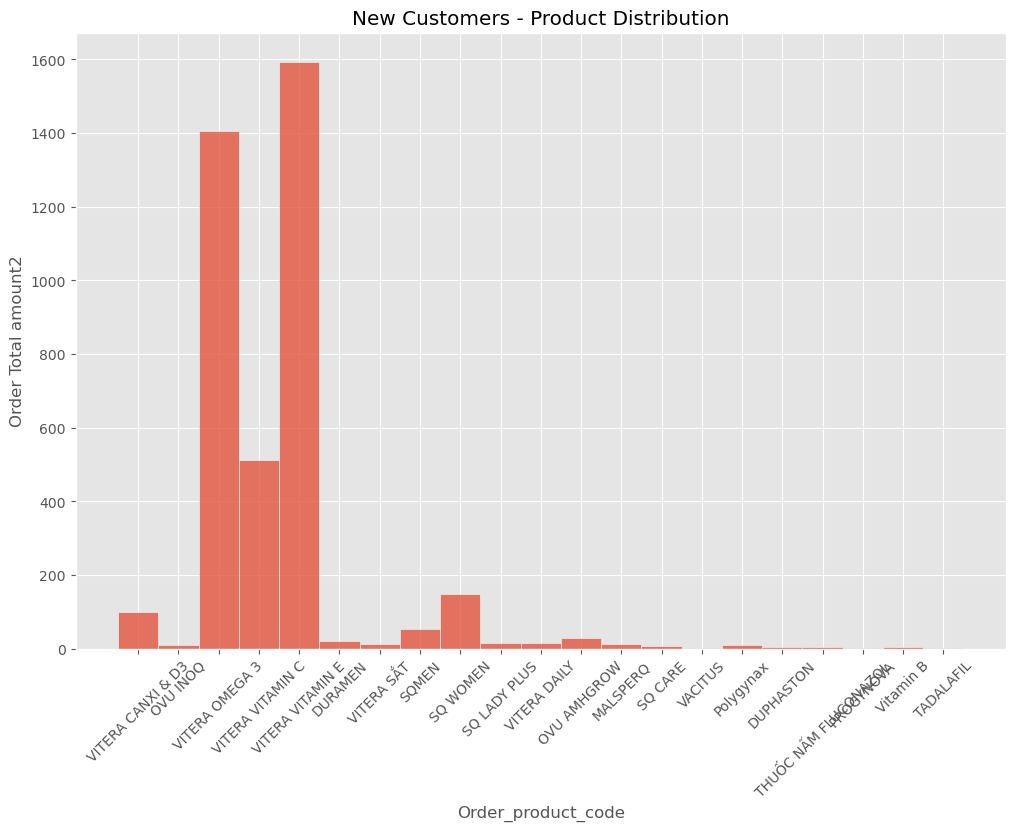

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một hình ảnh mới với kích thước 12x8
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ phân phối cho 'Order_product_code'
sns.histplot(new_cust_sale['Order_product_code'], kde=False, bins=30)

# Thêm nhãn và tiêu đề
plt.xlabel('Order_product_code')
plt.ylabel('Order Total amount2')
plt.title('New Customers - Product Distribution')

# Xoay nhãn trục x
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()


Old Customer

In [230]:
# Loading dataset
old_cust_sale = pd.read_excel('c:\\Users\\Admin\\OneDrive\\Documents\\TS Group_EXCEL\\2024_2023_07\\PushSale_OldCustomer.xlsx')

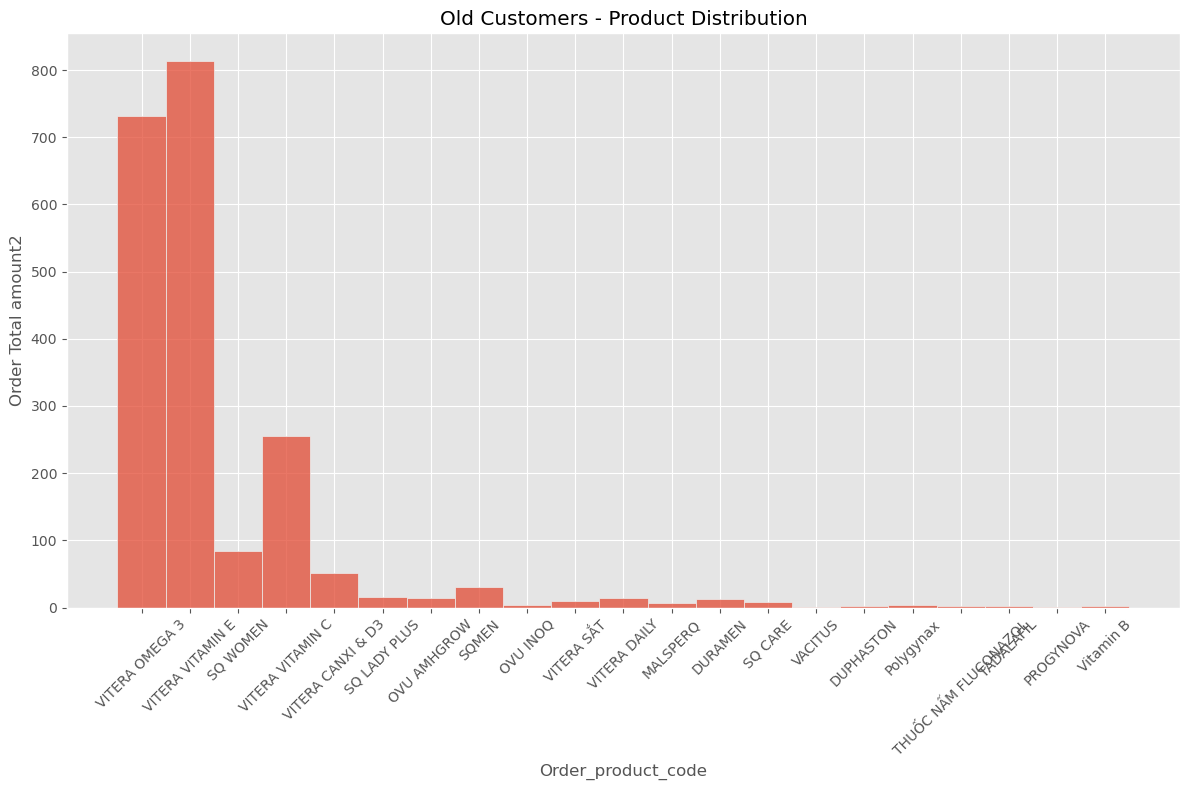

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo một hình ảnh mới với kích thước 12x8
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ phân phối cho 'Order_product_code'
sns.histplot(old_cust_sale['Order_product_code'], kde=False, bins=30)

# Thêm nhãn và tiêu đề
plt.xlabel('Order_product_code')
plt.ylabel('Order Total amount2')
plt.title('Old Customers - Product Distribution')

# Xoay nhãn trục x
plt.xticks(rotation=45)

# Sử dụng tight_layout để tối ưu hóa không gian
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


In [232]:
PushSale = pd.read_excel('c:\\Users\\Admin\\OneDrive\\Documents\\TS Group_EXCEL\\2024_2023_07\\PUSHSALE.xlsx')

TOP 5 BEST SALER


C:\Users\Admin\AppData\Local\Temp\ipykernel_19428\3941993359.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top5_2023 = df_2023.groupby(['Month_order']).apply(lambda x: x.nlargest(5, 'Order Total amount2')).reset_index(drop=True)


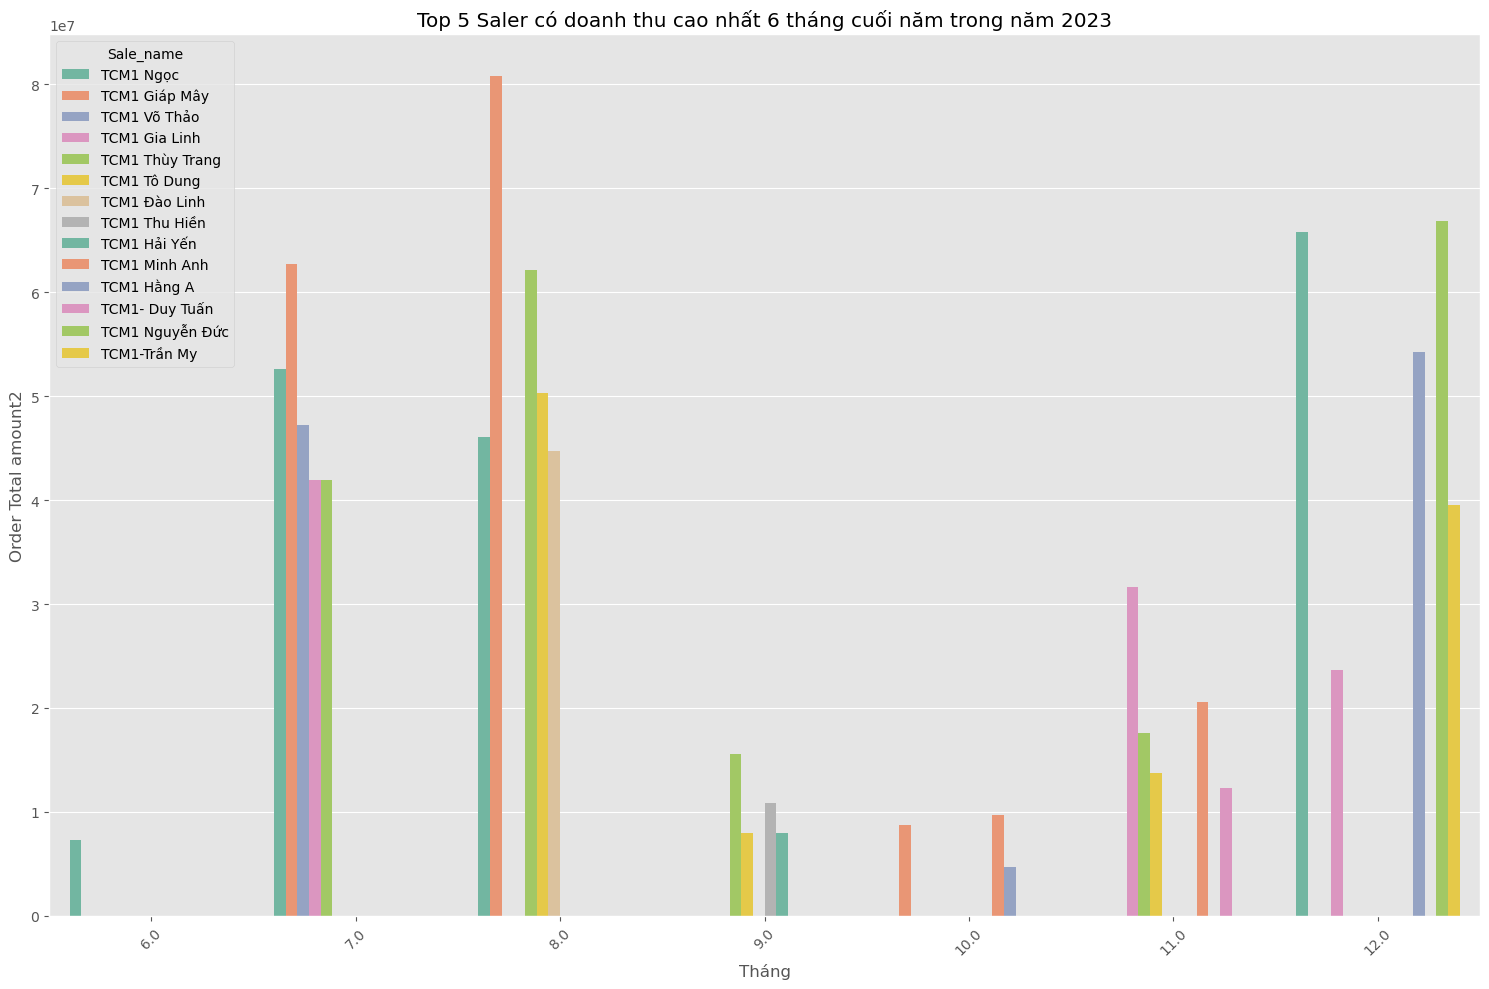

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm dữ liệu theo năm, tháng và tính tổng doanh thu cho từng nhân viên bán hàng
PushSale_rfm_table_grouped = PushSale_rfm_table.groupby(['Year_order', 'Month_order', 'Sale_name'])['Order Total amount2'].sum().reset_index()

# Lọc dữ liệu cho năm 2023
df_2023 = PushSale_rfm_table_grouped[PushSale_rfm_table_grouped['Year_order'] == 2023]

# Sắp xếp và chọn top 5 người bán hàng có doanh thu cao nhất cho mỗi tháng
df_top5_2023 = df_2023.groupby(['Month_order']).apply(lambda x: x.nlargest(5, 'Order Total amount2')).reset_index(drop=True)

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
sns.barplot(data=df_top5_2023, x='Month_order', y='Order Total amount2', hue='Sale_name', palette='Set2')

# Tùy chỉnh nhãn và tiêu đề
plt.title('Top 5 Saler có doanh thu cao nhất 6 tháng cuối năm trong năm 2023')
plt.xlabel('Tháng')
plt.ylabel('Order Total amount2')

# Xoay nhãn trục x để tránh chồng chéo
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_19428\935369707.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top5_2024 = df_2024.groupby(['Month_order']).apply(lambda x: x.nlargest(5, 'Order Total amount2')).reset_index(drop=True)


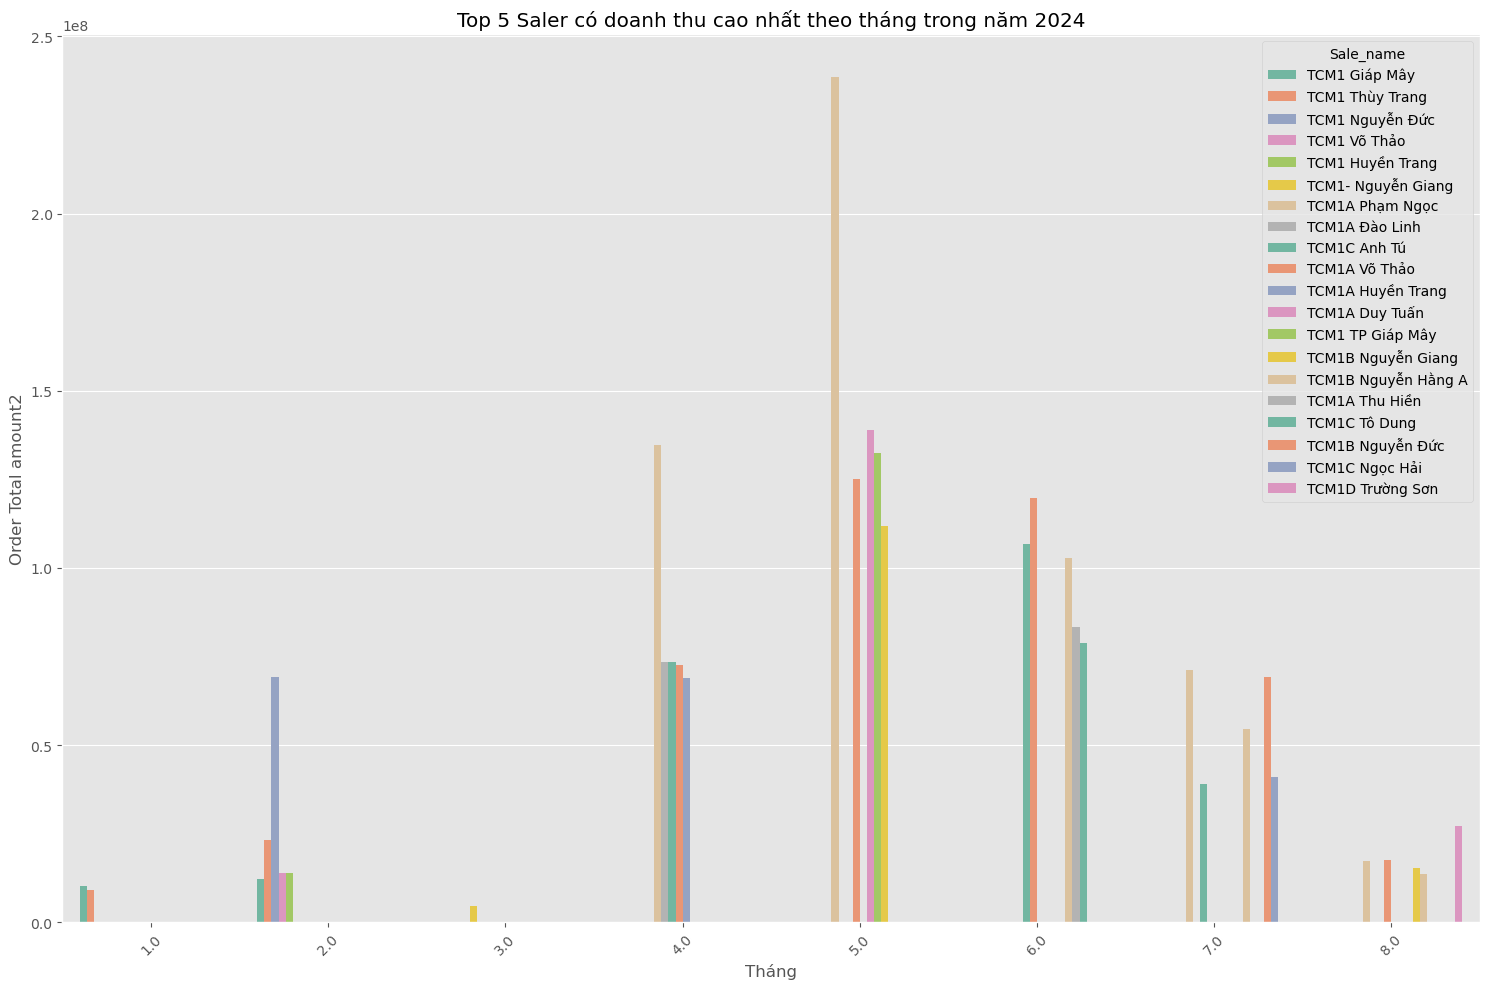

In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nhóm dữ liệu theo năm, tháng và tính tổng doanh thu cho từng nhân viên bán hàng
PushSale_rfm_table_grouped = PushSale_rfm_table.groupby(['Year_order', 'Month_order', 'Sale_name'])['Order Total amount2'].sum().reset_index()

# Lọc dữ liệu cho năm 2024
df_2024 = PushSale_rfm_table_grouped[PushSale_rfm_table_grouped['Year_order'] == 2024]

# Sắp xếp và chọn top 5 người bán hàng có doanh thu cao nhất cho mỗi tháng
df_top5_2024 = df_2024.groupby(['Month_order']).apply(lambda x: x.nlargest(5, 'Order Total amount2')).reset_index(drop=True)

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))
sns.barplot(data=df_top5_2024, x='Month_order', y='Order Total amount2', hue='Sale_name', palette='Set2')

# Tùy chỉnh nhãn và tiêu đề
plt.title('Top 5 Saler có doanh thu cao nhất theo tháng trong năm 2024')
plt.xlabel('Tháng')
plt.ylabel('Order Total amount2')

# Xoay nhãn trục x để tránh chồng chéo
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


5. Customer Segment Distribution

<b>Finally we can plot the Number of Customers present under a Customer Segment.</b>

In [175]:
PushSale_rfm_table.columns = PushSale_rfm_table.columns.str.strip()


In [180]:
print(PushSale_rfm_table.columns)


Index(['No.', '#', 'Order_code', 'Data_date', 'Data_source', 'MKT_Name',
       'MKT_TK', 'Customer_full_name', 'Customer_phone_number',
       'Customer_classification', 'Customer_message', 'Sale_notes',
       'Sale_operation', 'Sale_operation_results', 'Sale_date_of_data_receipt',
       'Sale_operation_date', 'Sale_order_closing_date', 'Sale_name',
       'Sale_TK', 'Order_closing_status', 'Order_product_name',
       'Order_product_code', 'Order_product_unit_price', 'Product_quantity',
       'Order_total_quantity', 'Order_product_weight', 'Order_total_weight',
       'Order_amount', 'Order_total_amount', 'Order_total_discount',
       'Order_COD_collected_from_customer', 'Order Total amount2',
       'Order_deposit', 'Order_customer_needs_to_pay',
       'Delivery_bill_of_lading', 'Delivery_unit', 'Service_delivery',
       'Delivery_Status', 'Reconciliation', 'Delivery_commune',
       'Delivery_district', 'Delivery_province', 'recency', 'frequency',
       'monetary', 'f_quarti

In [177]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [178]:
# Applying the above functions and creating a new feature rank

PushSale_rfm_table['rank']=PushSale_rfm_table[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19428\782112168.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


In [183]:
# Calculating the number of unique customers under a customer title.

cust_per_title = PushSale_rfm_table[['detail_cust_title','Customer_phone_number','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [184]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
1,Becoming Loyal,3,138
8,Recent Customer,4,130
7,Potential Customer,5,44
4,Late Bloomer,6,220
5,Loosing Customer,7,48
3,High Risk Customer,8,133
0,Almost Lost Customer,9,100
2,Evasive Customer,10,160
6,Lost Customer,11,79


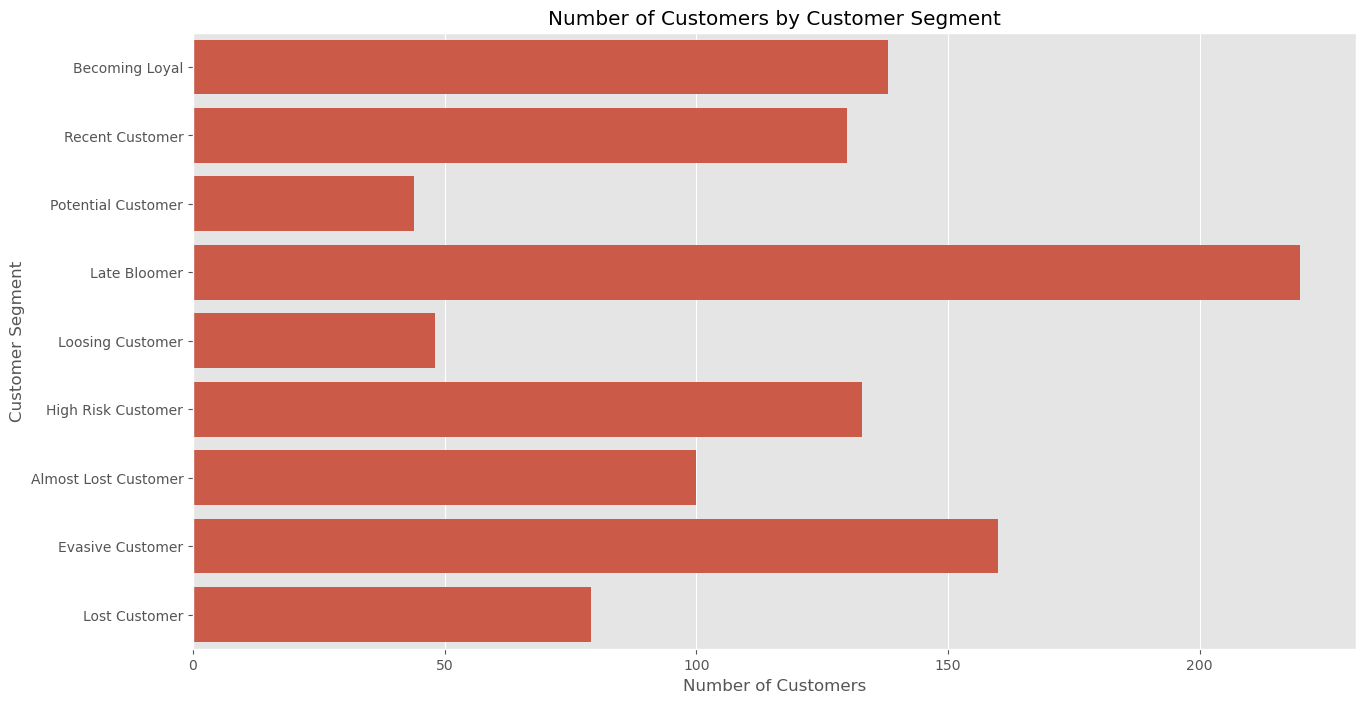

In [197]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

Exporting file

In [187]:
PushSale_rfm_table.to_csv('PushSale_RFM_Analysis_2023_2024_07.csv', index=False)